In [41]:
## Compose portfolio list based on "election news" outcomes
## Get Historical Datas of ETF or STK from YHfinance

import yfinance as yf
import pandas as pd
import numpy as np
## 2008 - 2016 election 
#DEM : GOOGL, GS
#REP : CVX, LMT
##2020 election 
#DEM : NFLX, MSFT    
#REP : ORCL, TGNA
##2024 election
#DEM : NFLX, AAPL 
#REP : DJT, TSLA 


BEF2020DEMSTK=['GOOGL','GS']
BEF2020REPSTK=['CVX', 'LMT']
E2020DEMSTK= ['NFLX','MSFT']
E2020REPSTK=['ORCL','TGNA']
E2024DEMSTK=['NFLX', 'AAPL']
E2024REPSTK=['DJT','TSLA']


In [42]:
## Start to buy stocks from option expiry date in Sep to election date in Nov

events = pd.read_csv("../data/events.csv", parse_dates=["date"])

exps = events.loc[
    (events["event_type"] == "us_equity_options_expiry")
    & (events["date"].dt.year.between(2008, 2024))
    & (events["date"].dt.month == 9),
    ["year", "date", "event_type"],
].reset_index(drop=True)

events["election_date"] = pd.to_datetime(events["election_date"])
events["date"] = pd.to_datetime(events["date"])

elecs = events.loc[
    (events["event_type"] == "election_window")
    & (events["date"].dt.normalize() == events["election_date"].dt.normalize())
    & (events["date"].dt.year.between(2008, 2024)),
    ["year", "election_date", "event_type"],
].reset_index(drop=True)

print(exps)
print(elecs)

   year       date                event_type
0  2008 2008-09-19  us_equity_options_expiry
1  2012 2012-09-21  us_equity_options_expiry
2  2016 2016-09-16  us_equity_options_expiry
3  2020 2020-09-18  us_equity_options_expiry
4  2024 2024-09-20  us_equity_options_expiry
   year election_date       event_type
0  2008    2008-11-04  election_window
1  2012    2012-11-06  election_window
2  2016    2016-11-08  election_window
3  2020    2020-11-03  election_window
4  2024    2024-11-05  election_window


In [43]:
from pathlib import Path

# Load polls_by_cycle saved from poll.ipynb
polls_by_cycle = {}
poll_dir = Path("../data/polls_by_cycle")
for csv_path in sorted(poll_dir.glob("*poll.csv")):
    key = csv_path.stem
    df = pd.read_csv(csv_path, parse_dates=[0], index_col=0)
    polls_by_cycle[key] = df

print(f"Loaded {len(polls_by_cycle)} poll cycles from {poll_dir}")


Loaded 15 poll cycles from ../data/polls_by_cycle


In [44]:
operating_periods = [
    ('2008-09-20','2008-11-06'),
    ('2012-09-22','2012-11-08'),
    ('2016-09-17','2016-11-10'),
    ('2020-09-19','2020-11-05'),
    ('2024-09-21','2024-11-07')
]

data_periods = [
    (f"{pd.to_datetime(start).year}-01-01", end)
    for start, end in operating_periods
]

period_portfolios = {
    2008: BEF2020DEMSTK + BEF2020REPSTK,
    2012: BEF2020DEMSTK + BEF2020REPSTK,
    2016: BEF2020DEMSTK + BEF2020REPSTK,
    2020: E2020DEMSTK + E2020REPSTK,
    2024: E2024DEMSTK + E2024REPSTK,
}

hist_data = {}
for (start, end), (data_start, data_end) in zip(operating_periods, data_periods):
    year = pd.to_datetime(start).year
    tickers_for_period = period_portfolios.get(year, [])
    for ticker in tickers_for_period:
        tk = yf.Ticker(ticker)
        hist_data.setdefault(ticker, {})
        df = tk.history(start=data_start, end=data_end)
        hist_data[ticker][(start, end)] = df
        print(f"Fetched {ticker} from {data_start} to {data_end}, {len(df)} rows")

hist_data['CVX'][('2016-09-17','2016-11-10')]


Fetched GOOGL from 2008-01-01 to 2008-11-06, 215 rows
Fetched GS from 2008-01-01 to 2008-11-06, 215 rows
Fetched CVX from 2008-01-01 to 2008-11-06, 215 rows
Fetched LMT from 2008-01-01 to 2008-11-06, 215 rows
Fetched GOOGL from 2012-01-01 to 2012-11-08, 214 rows
Fetched GS from 2012-01-01 to 2012-11-08, 214 rows
Fetched CVX from 2012-01-01 to 2012-11-08, 214 rows
Fetched LMT from 2012-01-01 to 2012-11-08, 214 rows
Fetched GOOGL from 2016-01-01 to 2016-11-10, 217 rows
Fetched GS from 2016-01-01 to 2016-11-10, 217 rows
Fetched CVX from 2016-01-01 to 2016-11-10, 217 rows
Fetched LMT from 2016-01-01 to 2016-11-10, 217 rows
Fetched NFLX from 2020-01-01 to 2020-11-05, 214 rows
Fetched MSFT from 2020-01-01 to 2020-11-05, 214 rows
Fetched ORCL from 2020-01-01 to 2020-11-05, 214 rows
Fetched TGNA from 2020-01-01 to 2020-11-05, 214 rows
Fetched NFLX from 2024-01-01 to 2024-11-07, 215 rows
Fetched AAPL from 2024-01-01 to 2024-11-07, 215 rows
Fetched DJT from 2024-01-01 to 2024-11-07, 215 rows
Fet

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2016-01-04 00:00:00-05:00,58.366759,58.744876,57.088988,57.923450,11397300,0.0,0.0
2016-01-05 00:00:00-05:00,58.053839,58.444992,57.265006,58.418915,7883400,0.0,0.0
2016-01-06 00:00:00-05:00,57.004225,57.225877,55.517840,56.111088,14511400,0.0,0.0
2016-01-07 00:00:00-05:00,55.120198,55.902505,53.894577,54.122749,15368800,0.0,0.0
2016-01-08 00:00:00-05:00,54.363933,54.657296,52.949259,53.542507,11891600,0.0,0.0
...,...,...,...,...,...,...,...
2016-11-03 00:00:00-04:00,71.148503,71.593479,70.757465,71.054115,5703200,0.0,0.0
2016-11-04 00:00:00-04:00,70.959721,71.121528,70.373163,70.642845,7085400,0.0,0.0
2016-11-07 00:00:00-05:00,71.465374,72.126094,71.317049,72.038445,7333800,0.0,0.0


In [45]:
## Election neutral portfolio (year-specific DEM/REP; min-var per party)
# Year-specific portfolios (defined in earlier cell)
party_portfolios_by_year = {
    2008: {'DEM': BEF2020DEMSTK, 'REP': BEF2020REPSTK},
    2012: {'DEM': BEF2020DEMSTK, 'REP': BEF2020REPSTK},
    2016: {'DEM': BEF2020DEMSTK, 'REP': BEF2020REPSTK},
    2020: {'DEM': E2020DEMSTK,  'REP': E2020REPSTK},
    2024: {'DEM': E2024DEMSTK,  'REP': E2024REPSTK},
}


# Candidate-to-party mapping for poll leader detection
CANDIDATE_PARTY_MAP = {
    'Barack Obama': 'DEM',
    'John McCain': 'REP',
    'Mitt Romney': 'REP',
    'Hillary Rodham Clinton': 'DEM',
    'Donald Trump': 'REP',
    'Joseph R. Biden Jr.': 'DEM',
    'Kamala D. Harris': 'DEM',
}

# ---- config you may tweak ----
ALLOC_TOTAL = 100.0            # Total investment amount
ENTRY_PRICE_COL = 'Close'       # Buy price Option : 'Open or 'Close'
EXIT_PRICE_COL  = 'Open'       # Sell Price Option: 'Open' or 'Close'

def ensure_naive_dtindex(df: pd.DataFrame) -> pd.DataFrame:
    out = df.copy()
    idx = pd.to_datetime(out.index, errors='coerce')
    if getattr(idx, 'tz', None) is not None:
        idx = idx.tz_convert(None)
    out.index = idx
    return out.sort_index()

def min_var_weights(px_close: pd.DataFrame) -> pd.Series:
    rets = px_close.pct_change().dropna()
    if rets.shape[0] < 2:
        return pd.Series(np.repeat(1/len(px_close.columns), len(px_close.columns)), index=px_close.columns)
    cov = rets.cov()
    try:
        inv = np.linalg.pinv(cov.values)
        ones = np.ones(len(cov))
        w = inv @ ones
        w = w / (ones @ inv @ ones)
        return pd.Series(w, index=cov.index)
    except Exception:
        return pd.Series(np.repeat(1/len(px_close.columns), len(px_close.columns)), index=px_close.columns)

def mean_var_weights(px_close: pd.DataFrame) -> pd.Series:
    rets = px_close.pct_change().dropna()
    if rets.shape[0] < 2:
        return pd.Series(np.repeat(1/len(px_close.columns), len(px_close.columns)), index=px_close.columns)
    mu = rets.mean().values
    cov = rets.cov().values
    try:
        inv = np.linalg.pinv(cov)
        raw = inv @ mu
        denom = raw.sum()
        if denom == 0:
            return pd.Series(np.repeat(1/len(px_close.columns), len(px_close.columns)), index=px_close.columns)
        w = raw / denom
        return pd.Series(w, index=px_close.columns)
    except Exception:
        return pd.Series(np.repeat(1/len(px_close.columns), len(px_close.columns)), index=px_close.columns)


def compute_preperiod_weights(px_close: pd.DataFrame, tickers, start_day) -> pd.Series:
    start_day = pd.Timestamp(start_day)
    year_start = pd.Timestamp(f"{start_day.year}-01-01")
    end_day = start_day - pd.Timedelta(days=1)
    hist = px_close.loc[year_start:end_day, tickers]
    hist = hist.dropna(how='all')
    if hist.empty:
        return pd.Series(np.repeat(1/len(tickers), len(tickers)), index=tickers)
    return min_var_weights(hist[tickers])

def compute_preperiod_weights_mean_var(px_close: pd.DataFrame, tickers, start_day) -> pd.Series:
    start_day = pd.Timestamp(start_day)
    year_start = pd.Timestamp(f"{start_day.year}-01-01")
    end_day = start_day - pd.Timedelta(days=1)
    hist = px_close.loc[year_start:end_day, tickers]
    hist = hist.dropna(how='all')
    if hist.empty:
        return pd.Series(np.repeat(1/len(tickers), len(tickers)), index=tickers)
    return mean_var_weights(hist[tickers])


def simulate_party(px_open: pd.DataFrame, px_close: pd.DataFrame, tickers, capital0: float,
                   entry_price_col: str, exit_price_col: str, weights: pd.Series) -> pd.Series:
    px_open = ensure_naive_dtindex(px_open[tickers])
    px_close = ensure_naive_dtindex(px_close[tickers])
    idx = px_open.index.intersection(px_close.index)
    px_open = px_open.loc[idx]
    px_close = px_close.loc[idx]
    if idx.empty:
        return pd.Series(dtype=float)
    trade_px = px_open if entry_price_col.lower() == 'open' else px_close
    exit_px = px_open if exit_price_col.lower() == 'open' else px_close
    shares = {t: 0.0 for t in tickers}
    vals = []
    first_day = idx[0]
    for t in tickers:
        price = float(trade_px.loc[first_day, t])
        target_value = capital0 * float(weights[t])
        shares[t] = target_value / price if price > 0 else 0.0
    for day in idx:
        day_val_close = sum(shares[t] * float(px_close.loc[day, t]) for t in tickers)
        vals.append(day_val_close)
    # Override the last-day valuation using exit_price_col
    last_day = idx[-1]
    final_val = sum(shares[t] * float(exit_px.loc[last_day, t]) for t in tickers)
    vals[-1] = final_val
    return pd.Series(vals, index=idx)

def build_poll_margin_exit_portfolio(hist_data, operating_periods, party_portfolios_by_year, polls_by_cycle,
                                    alloc_total=100.0, entry_price_col='Open', exit_price_col='Close',
                                    ma_days=7, margin_threshold=5.0, candidate_party_map=None, weight_method='min_var', verbose=True):
    results = {}
    if candidate_party_map is None:
        candidate_party_map = CANDIDATE_PARTY_MAP
    for period in operating_periods:
        year = pd.to_datetime(period[0]).year
        parties = party_portfolios_by_year.get(year)
        if not parties:
            print(f"Skipping {period}: no portfolio defined for {year}")
            continue
        dem = parties.get('DEM', [])
        rep = parties.get('REP', [])
        if not dem or not rep:
            print(f"Skipping {period}: missing DEM/REP list")
            continue
        poll_key = f"{year}poll"
        poll_df = polls_by_cycle.get(poll_key)
        if poll_df is None or poll_df.empty or 'margin' not in poll_df.columns:
            print(f"Skipping {period}: missing poll margin for {poll_key}")
            continue
        poll_df = ensure_naive_dtindex(poll_df)
        candidate_cols = [c for c in poll_df.columns if c != 'margin']
        if not candidate_cols:
            print(f"Skipping {period}: no candidates in {poll_key}")
            continue
        margin_ma = poll_df['margin'].rolling(ma_days, min_periods=1).mean()
        signal_dates = margin_ma[margin_ma >= margin_threshold].index
        reentry_ma = poll_df['margin'].rolling(3, min_periods=1).mean()
        reentry_dates = reentry_ma[reentry_ma <= 4.0].index

        px_open = {}
        px_close = {}
        for t in dem + rep:
            df = hist_data.get(t, {}).get(period)
            if df is None or df.empty:
                px_open = None
                break
            df = ensure_naive_dtindex(df)
            px_open[t] = df[['Open']].rename(columns={'Open': t})
            px_close[t] = df[['Close']].rename(columns={'Close': t})
        if px_open is None:
            print(f"Skipping {period}: missing data")
            continue
        px_open = pd.concat(px_open.values(), axis=1, join='inner')
        px_close = pd.concat(px_close.values(), axis=1, join='inner')
        full_idx = px_open.index.intersection(px_close.index)
        px_open = px_open.loc[full_idx]
        px_close = px_close.loc[full_idx]
        if full_idx.empty:
            print(f"Skipping {period}: no trading days")
            continue
        period_start = pd.Timestamp(period[0])
        period_end = pd.Timestamp(period[1])
        trade_idx = full_idx[(full_idx >= period_start) & (full_idx <= period_end)]
        if trade_idx.empty:
            print(f"Skipping {period}: no trading days in period")
            continue

        # Map signal dates to next trading day shifts into winner side
        shift_days = {}
        for d in signal_dates:
            if d not in poll_df.index:
                continue
            leader = poll_df.loc[d, candidate_cols].astype(float).idxmax()
            leader_party = candidate_party_map.get(leader)
            if leader_party is None:
                continue
            next_days = trade_idx[trade_idx > d]
            if len(next_days) > 0:
                shift_days[next_days[0]] = leader_party

        # Map reentry dates to next trading day rebalancing back to 50/50
        reentry_days = set()
        for d in reentry_dates:
            next_days = trade_idx[trade_idx > d]
            if len(next_days) > 0:
                reentry_days.add(next_days[0])

        start_day = trade_idx[0]
        if weight_method == 'mean_var':
            w_dem = compute_preperiod_weights_mean_var(px_close, dem, start_day)
            w_rep = compute_preperiod_weights_mean_var(px_close, rep, start_day)
        else:
            w_dem = compute_preperiod_weights(px_close, dem, start_day)
            w_rep = compute_preperiod_weights(px_close, rep, start_day)

        shares = {t: 0.0 for t in dem + rep}
        vals = []
        invested = False
        capital = alloc_total
        for day in trade_idx:
            if not invested and day == trade_idx[0]:
                for t in dem:
                    price = float(px_open.loc[day, t])
                    target = capital * 0.5 * float(w_dem[t])
                    shares[t] = target / price if price > 0 else 0.0
                for t in rep:
                    price = float(px_open.loc[day, t])
                    target = capital * 0.5 * float(w_rep[t])
                    shares[t] = target / price if price > 0 else 0.0
                invested = True

            if invested and day in reentry_days:
                # rebalance at open back to 50/50
                capital = sum(shares[t] * float(px_open.loc[day, t]) for t in dem + rep)
                for t in dem + rep:
                    shares[t] = 0.0
                for t in dem:
                    price = float(px_open.loc[day, t])
                    target = capital * 0.5 * float(w_dem[t])
                    shares[t] = target / price if price > 0 else 0.0
                for t in rep:
                    price = float(px_open.loc[day, t])
                    target = capital * 0.5 * float(w_rep[t])
                    shares[t] = target / price if price > 0 else 0.0

            if invested and day in shift_days:
                # rebalance at open into the leading party's portfolio
                capital = sum(shares[t] * float(px_open.loc[day, t]) for t in dem + rep)
                leader_party = shift_days[day]
                for t in dem + rep:
                    shares[t] = 0.0
                if leader_party == 'DEM':
                    for t in dem:
                        price = float(px_open.loc[day, t])
                        target = capital * float(w_dem[t])
                        shares[t] = target / price if price > 0 else 0.0
                elif leader_party == 'REP':
                    for t in rep:
                        price = float(px_open.loc[day, t])
                        target = capital * float(w_rep[t])
                        shares[t] = target / price if price > 0 else 0.0

            if invested:
                capital = sum(shares[t] * float(px_close.loc[day, t]) for t in dem + rep)
            vals.append(capital)

        # If still invested, respect exit_price_col on last day
        last_day = trade_idx[-1]
        if invested:
            exit_px = px_open if exit_price_col.lower() == 'open' else px_close
            final_val = sum(shares[t] * float(exit_px.loc[last_day, t]) for t in dem + rep)
            vals[-1] = final_val

        series = pd.Series(vals, index=trade_idx, name='Portfolio')
        results[period] = series
        ret = (series.iloc[-1] / alloc_total - 1.0) * 100 if len(series) > 0 else np.nan
        if verbose:
            print(f"{period}: Return {ret:.2f}% (poll-ma-shift)")
    return results


def build_neutral_portfolio(hist_data, operating_periods, party_portfolios_by_year, alloc_total=100.0, entry_price_col='Open', exit_price_col='Close', weight_method='min_var', verbose=True):
    results = {}
    for period in operating_periods:
        year = pd.to_datetime(period[0]).year
        parties = party_portfolios_by_year.get(year)
        if not parties:
            print(f"Skipping {period}: no portfolio defined for {year}")
            continue
        dem = parties.get('DEM', [])
        rep = parties.get('REP', [])
        if not dem or not rep:
            print(f"Skipping {period}: missing DEM/REP list")
            continue
        px_open = {}
        px_close = {}
        for t in dem + rep:
            df = hist_data.get(t, {}).get(period)
            if df is None or df.empty:
                px_open = None
                break
            df = ensure_naive_dtindex(df)
            px_open[t] = df[['Open']].rename(columns={'Open': t})
            px_close[t] = df[['Close']].rename(columns={'Close': t})
        if px_open is None:
            print(f"Skipping {period}: missing data")
            continue
        px_open = pd.concat(px_open.values(), axis=1, join='inner')
        px_close = pd.concat(px_close.values(), axis=1, join='inner')
        full_idx = px_open.index.intersection(px_close.index)
        px_open = px_open.loc[full_idx]
        px_close = px_close.loc[full_idx]
        if full_idx.empty:
            print(f"Skipping {period}: no trading days")
            continue
        period_start = pd.Timestamp(period[0])
        period_end = pd.Timestamp(period[1])
        trade_idx = full_idx[(full_idx >= period_start) & (full_idx <= period_end)]
        if trade_idx.empty:
            print(f"Skipping {period}: no trading days in period")
            continue
        dem_cap = alloc_total * 0.5
        rep_cap = alloc_total * 0.5
        start_day = trade_idx[0]
        if weight_method == 'mean_var':
            w_dem = compute_preperiod_weights_mean_var(px_close, dem, start_day)
            w_rep = compute_preperiod_weights_mean_var(px_close, rep, start_day)
        else:
            w_dem = compute_preperiod_weights(px_close, dem, start_day)
            w_rep = compute_preperiod_weights(px_close, rep, start_day)
        dem_val = simulate_party(px_open.loc[trade_idx], px_close.loc[trade_idx], dem, dem_cap, entry_price_col, exit_price_col, w_dem)
        rep_val = simulate_party(px_open.loc[trade_idx], px_close.loc[trade_idx], rep, rep_cap, entry_price_col, exit_price_col, w_rep)
        portfolio = dem_val + rep_val
        results[period] = pd.DataFrame({'DEM_val': dem_val, 'REP_val': rep_val, 'Portfolio': portfolio})
        ret = (portfolio.iloc[-1] / portfolio.iloc[0] - 1.0) * 100 if len(portfolio) > 1 else np.nan
        if verbose:
            print(f"{period}: Return {ret:.2f}%")
    return results




In [46]:
## Run strategies and print returns
# Run baseline neutral strategy + returns
neutral_results = build_neutral_portfolio(
    hist_data, operating_periods, party_portfolios_by_year,
    alloc_total=ALLOC_TOTAL,
    entry_price_col=ENTRY_PRICE_COL, exit_price_col=EXIT_PRICE_COL,
    weight_method='min_var',
    verbose=False,
)
for (start, end), df in neutral_results.items():
    ret = (df['Portfolio'].iloc[-1] / df['Portfolio'].iloc[0] - 1) * 100
    print(f"Min-Var {(start, end)}: {ret:.2f}%")

meanvar_results = build_neutral_portfolio(
    hist_data, operating_periods, party_portfolios_by_year,
    alloc_total=ALLOC_TOTAL,
    entry_price_col=ENTRY_PRICE_COL, exit_price_col=EXIT_PRICE_COL,
    weight_method='mean_var',
    verbose=False,
)
for (start, end), df in meanvar_results.items():
    ret = (df['Portfolio'].iloc[-1] / df['Portfolio'].iloc[0] - 1) * 100
    print(f"Mean-Var {(start, end)}: {ret:.2f}%")

poll_shift_min_results = build_poll_margin_exit_portfolio(
    hist_data, operating_periods, party_portfolios_by_year, polls_by_cycle,
    alloc_total=ALLOC_TOTAL,
    entry_price_col=ENTRY_PRICE_COL, exit_price_col=EXIT_PRICE_COL,
    ma_days=5, margin_threshold=5,
    weight_method='min_var',
    verbose=False,
)
for (start, end), s in poll_shift_min_results.items():
    ret = (s.iloc[-1] / s.iloc[0] - 1) * 100 if len(s) > 0 else np.nan
    print(f"Poll-MA-Shift-Min {(start, end)}: {ret:.2f}%")

poll_shift_mean_results = build_poll_margin_exit_portfolio(
    hist_data, operating_periods, party_portfolios_by_year, polls_by_cycle,
    alloc_total=ALLOC_TOTAL,
    entry_price_col=ENTRY_PRICE_COL, exit_price_col=EXIT_PRICE_COL,
    ma_days=5, margin_threshold=5,
    weight_method='mean_var',
    verbose=False,
)
for (start, end), s in poll_shift_mean_results.items():
    ret = (s.iloc[-1] / s.iloc[0] - 1) * 100 if len(s) > 0 else np.nan
    print(f"Poll-MA-Shift-Mean {(start, end)}: {ret:.2f}%")

# Benchmark comparison: NASDAQ 1x(QQQ)
benchmarks = {
    'NASDAQ_1x': 'QQQ',
}
bench_results = {}
for (start, end) in operating_periods:
    bench_results[(start, end)] = {}
    for name, ticker in benchmarks.items():
        df = yf.Ticker(ticker).history(start=start, end=end)
        if df is None or df.empty:
            bench_results[(start, end)][name] = np.nan
            continue
        df = ensure_naive_dtindex(df)
        ret = (df['Close'].iloc[-1] / df['Close'].iloc[0] - 1.0) * 100
        bench_results[(start, end)][name] = ret

for period, vals in bench_results.items():
    nasdaq = vals.get('NASDAQ_1x')
    print(f"Benchmark {period}: NASDAQ_1x {nasdaq:.2f}%")


Min-Var ('2008-09-20', '2008-11-06'): -17.68%
Min-Var ('2012-09-22', '2012-11-08'): -3.12%
Min-Var ('2016-09-17', '2016-11-10'): 5.26%
Min-Var ('2020-09-19', '2020-11-05'): 0.85%
Min-Var ('2024-09-21', '2024-11-07'): 18.54%
Mean-Var ('2008-09-20', '2008-11-06'): -21.41%
Mean-Var ('2012-09-22', '2012-11-08'): 0.72%
Mean-Var ('2016-09-17', '2016-11-10'): -1.02%
Mean-Var ('2020-09-19', '2020-11-05'): -3.87%
Mean-Var ('2024-09-21', '2024-11-07'): 77.34%
Poll-MA-Shift-Min ('2008-09-20', '2008-11-06'): -16.33%
Poll-MA-Shift-Min ('2012-09-22', '2012-11-08'): -3.16%
Poll-MA-Shift-Min ('2016-09-17', '2016-11-10'): 4.54%
Poll-MA-Shift-Min ('2020-09-19', '2020-11-05'): 3.75%
Poll-MA-Shift-Min ('2024-09-21', '2024-11-07'): 15.29%
Poll-MA-Shift-Mean ('2008-09-20', '2008-11-06'): -13.77%
Poll-MA-Shift-Mean ('2012-09-22', '2012-11-08'): 0.69%
Poll-MA-Shift-Mean ('2016-09-17', '2016-11-10'): -5.54%
Poll-MA-Shift-Mean ('2020-09-19', '2020-11-05'): 2.26%
Poll-MA-Shift-Mean ('2024-09-21', '2024-11-07'): 

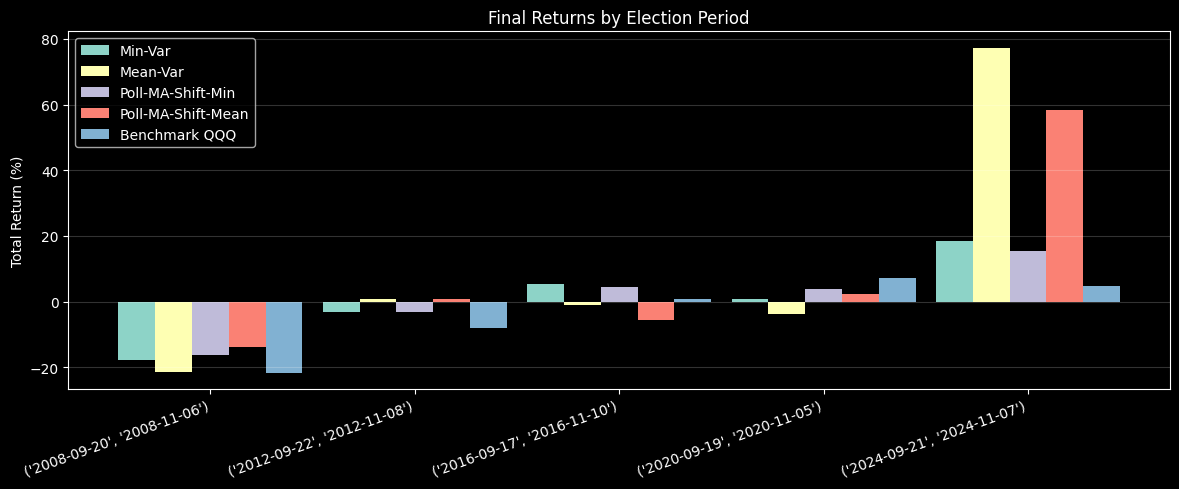

In [47]:
# Compare final returns per election period across strategies (bar chart, incl. benchmark)
import matplotlib.pyplot as plt
rows = []
for period in operating_periods:
    row = {'period': period}
    if period in neutral_results:
        s = neutral_results[period]['Portfolio']
        row['Min-Var'] = (s.iloc[-1] / s.iloc[0] - 1) * 100 if len(s) > 0 else np.nan
    if period in meanvar_results:
        s = meanvar_results[period]['Portfolio']
        row['Mean-Var'] = (s.iloc[-1] / s.iloc[0] - 1) * 100 if len(s) > 0 else np.nan
    if period in poll_shift_min_results:
        s = poll_shift_min_results[period]
        row['Poll-MA-Shift-Min'] = (s.iloc[-1] / s.iloc[0] - 1) * 100 if len(s) > 0 else np.nan
    if period in poll_shift_mean_results:
        s = poll_shift_mean_results[period]
        row['Poll-MA-Shift-Mean'] = (s.iloc[-1] / s.iloc[0] - 1) * 100 if len(s) > 0 else np.nan
    bench = yf.Ticker('QQQ').history(start=period[0], end=period[1])
    if bench is not None and not bench.empty:
        row['Benchmark QQQ'] = (bench['Close'].iloc[-1] / bench['Close'].iloc[0] - 1) * 100
    rows.append(row)

labels = [str(p) for p in [r['period'] for r in rows]]
series = ['Min-Var', 'Mean-Var', 'Poll-MA-Shift-Min', 'Poll-MA-Shift-Mean', 'Benchmark QQQ']
x = np.arange(len(labels))
width = 0.18

fig, ax = plt.subplots(figsize=(12, 5))
for i, name in enumerate(series):
    vals = [r.get(name, np.nan) for r in rows]
    ax.bar(x + (i - 2) * width, vals, width=width, label=name)

ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=20, ha='right')
ax.set_ylabel('Total Return (%)')
ax.set_title('Final Returns by Election Period')
ax.grid(True, axis='y', alpha=0.2)
ax.legend()
plt.tight_layout()
plt.show()


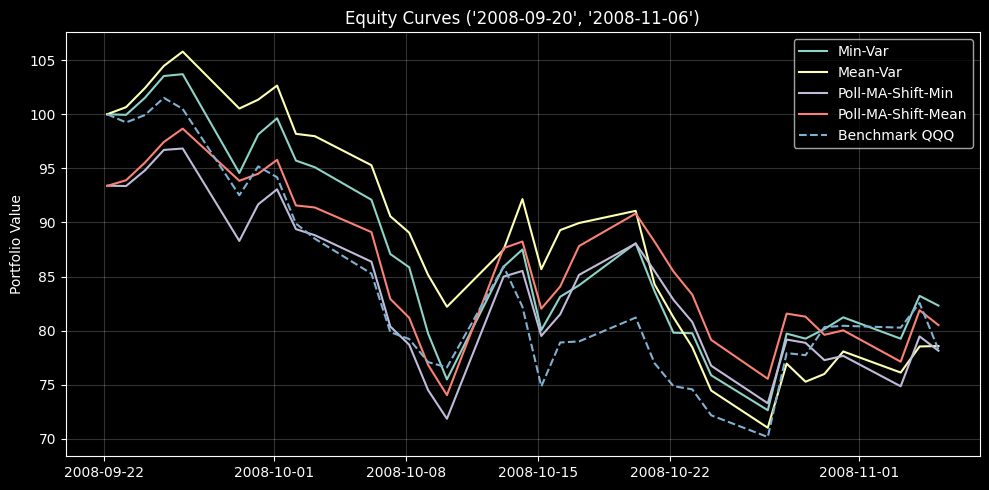

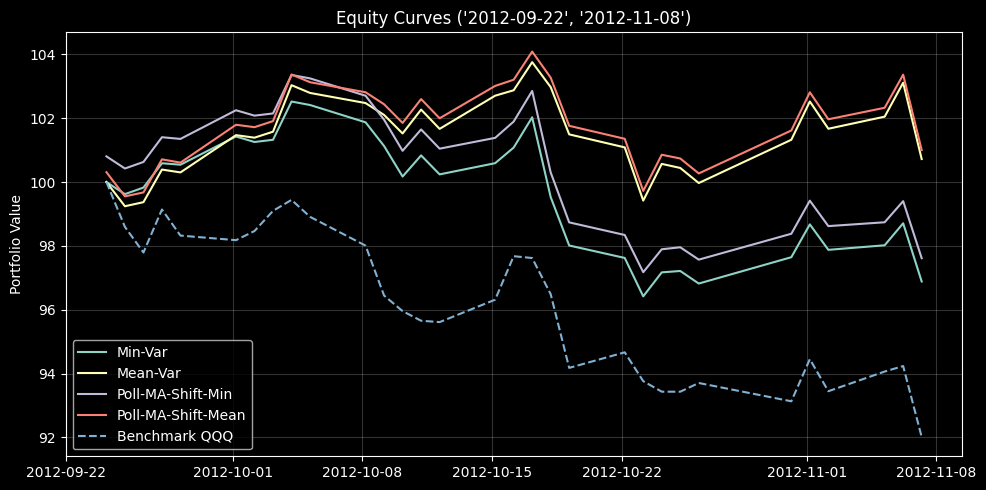

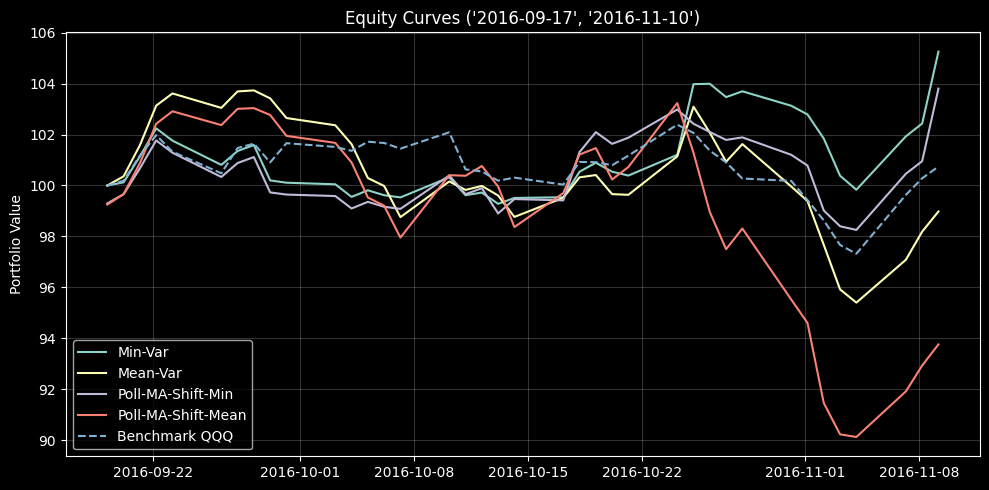

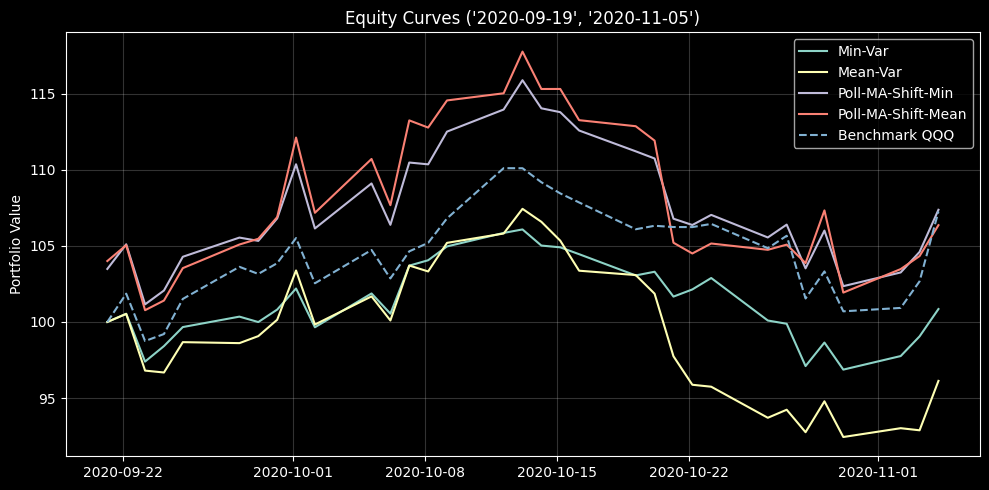

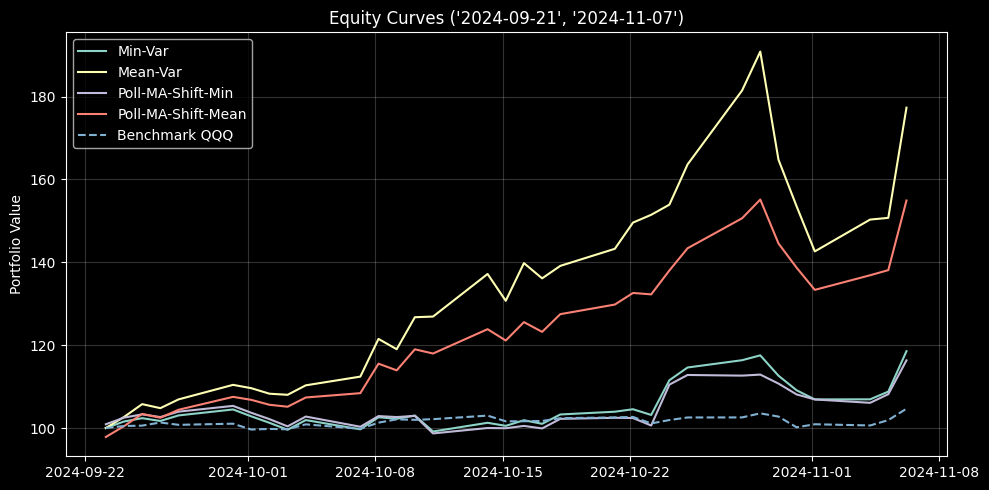

In [48]:
# Plot strategy equity curves per period (with benchmark)
for period in operating_periods:
    fig, ax = plt.subplots(figsize=(10, 5))
    if period in neutral_results:
        ax.plot(neutral_results[period].index, neutral_results[period]['Portfolio'], label='Min-Var')
    if period in meanvar_results:
        ax.plot(meanvar_results[period].index, meanvar_results[period]['Portfolio'], label='Mean-Var')
    if period in poll_shift_min_results:
        ax.plot(poll_shift_min_results[period].index, poll_shift_min_results[period], label='Poll-MA-Shift-Min')
    if period in poll_shift_mean_results:
        ax.plot(poll_shift_mean_results[period].index, poll_shift_mean_results[period], label='Poll-MA-Shift-Mean')

    bench = yf.Ticker('QQQ').history(start=period[0], end=period[1])
    if bench is not None and not bench.empty:
        bench = ensure_naive_dtindex(bench)
        bench_series = bench['Close'] / bench['Close'].iloc[0] * ALLOC_TOTAL
        ax.plot(bench_series.index, bench_series, label='Benchmark QQQ', linestyle='--')

    ax.set_title(f"Equity Curves {period}")
    ax.set_ylabel('Portfolio Value')
    ax.grid(True, alpha=0.2)
    ax.legend()
    plt.tight_layout()
    plt.show()


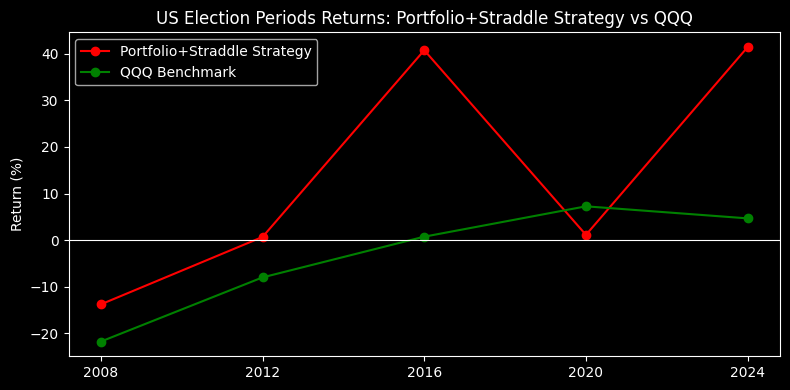

In [ ]:
# Yearly comparison: portfolio + Straddle Strategy vs QQQ benchmark
# Inputs: poll_ma_shift_mean (2008/2012), straddle_returns (2016/2020/2024), portfolio_returns (2016/2020/2024)
poll_ma_shift_mean = {
    2008: -13.77,
    2012: 0.69,
}
straddle_returns = {
    2016: 87.0,
    2020: 0.0,
    2024: 24.45,
}
portfolio_returns = {
    2016: -5.54,
    2020: 2.26,
    2024: 58.36,
}
# Fill portfolio_returns from previously computed results if available
if 'poll_returns' in globals():
    for y in [2016, 2020, 2024]:
        if y in poll_returns:
            portfolio_returns[y] = poll_returns[y]

mixed_returns = {}
for y in [2008, 2012, 2016, 2020, 2024]:
    if y in poll_ma_shift_mean:
        mixed_returns[y] = poll_ma_shift_mean[y]
    else:
        s_ret = straddle_returns.get(y)
        p_ret = portfolio_returns.get(y)
        if s_ret is None or p_ret is None:
            mixed_returns[y] = np.nan
        else:
            mixed_returns[y] = (s_ret + p_ret) / 2.0

# Extract QQQ benchmark by year from bench_results
bench_by_year = {}
if 'bench_results' in globals():
    for (start, end), vals in bench_results.items():
        y = pd.to_datetime(start).year
        if y in [2008, 2012, 2016, 2020, 2024]:
            bench_by_year[y] = vals.get('NASDAQ_1x')

years = [2008, 2012, 2016, 2020, 2024]
mixed_vals = [mixed_returns.get(y, np.nan) for y in years]
bench_vals = [bench_by_year.get(y, np.nan) for y in years]

x = np.arange(len(years))
plt.style.use('dark_background')
plt.figure(figsize=(8, 4))
plt.plot(x, mixed_vals, color='red', marker='o', label='Portfolio+Straddle Strategy')
plt.plot(x, bench_vals, color='green', marker='o', label='QQQ Benchmark')
plt.axhline(0, color='white', linewidth=0.8)
plt.xticks(x, years)
plt.ylabel('Return (%)')
plt.title('US Election Periods Returns: Portfolio+Straddle Strategy vs QQQ')
plt.legend()
plt.tight_layout()
plt.show()
